In [1]:
# this cell is hidden by metadata
from nbodykit import style
import matplotlib.pyplot as plt
plt.style.use(style.notebook)

In [2]:
from nbodykit.lab import cosmology

cosmo = cosmology.Cosmology()
print("original sigma8 = %.4f" % cosmo.sigma8)

new_cosmo = cosmo.match(sigma8=0.82)
print("new sigma8 = %.4f" % new_cosmo.sigma8)

original sigma8 = 0.8380
new sigma8 = 0.8200


In [3]:
cosmo = cosmo.clone(h=0.7, nonlinear=True)

In [4]:
cosmo_dict = dict(cosmo)
print(cosmo_dict)

{'output': 'vTk dTk mPk', 'extra metric transfer functions': 'y', 'n_s': 0.9667, 'gauge': 'synchronous', 'N_ur': 2.0328, 'T_cmb': 2.7255, 'Omega_cdm': 0.26377065934278865, 'Omega_b': 0.0482754208891869, 'N_ncdm': 1, 'P_k_max_h/Mpc': 10.0, 'z_max_pk': 100.0, 'h': 0.7, 'm_ncdm': [0.06], 'non linear': 'halofit'}


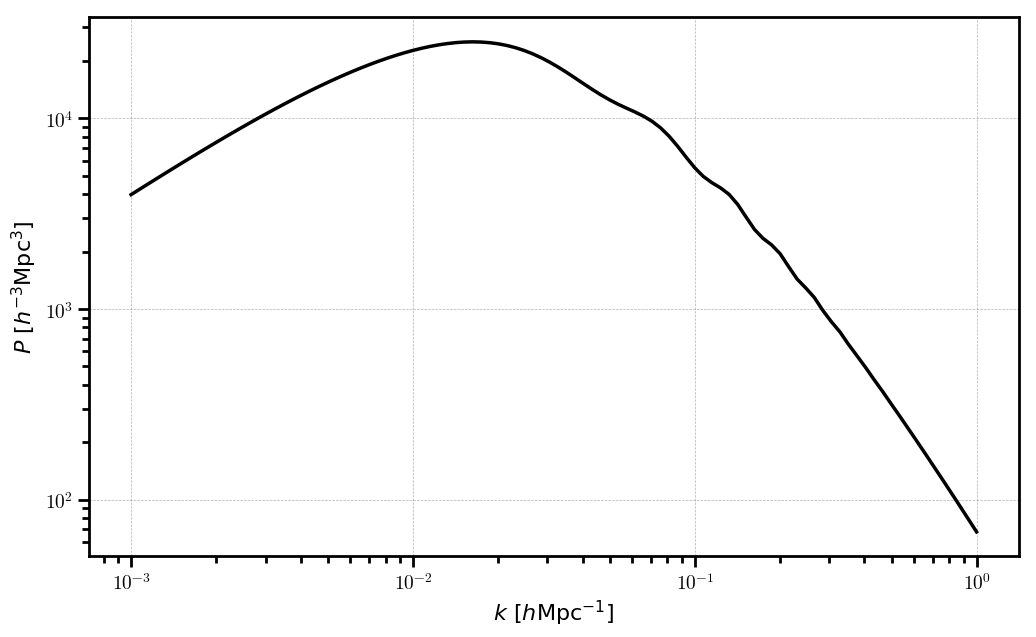

In [5]:
import matplotlib.pyplot as plt
import numpy as np

c = cosmology.Planck15
Plin = cosmology.LinearPower(c, redshift=0., transfer='CLASS')

k = np.logspace(-3, 0, 100)
plt.loglog(k, Plin(k), c='k')

plt.xlabel(r"$k$ $[h \mathrm{Mpc}^{-1}]$")
plt.ylabel(r"$P$ $[h^{-3} \mathrm{Mpc}^{3}]$")
plt.show()

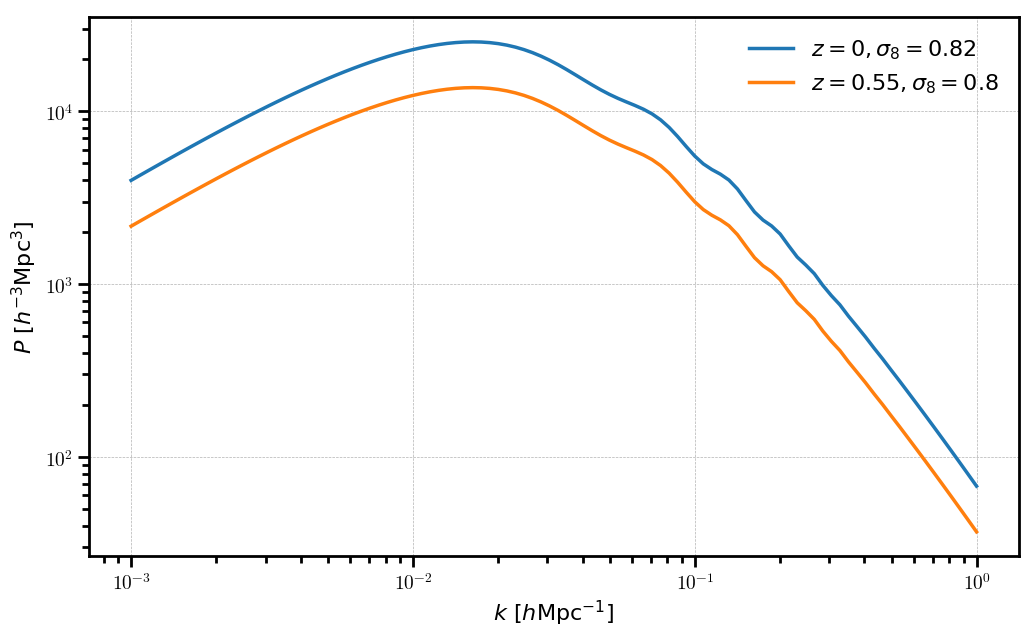

In [6]:
# original power
plt.loglog(k, Plin(k), label=r"$z=0, \sigma_8=%.2f$" % Plin.sigma8)

# update the redshift and sigma8
Plin.redshift = 0.55
Plin.sigma8 = 0.80
plt.loglog(k, Plin(k), label=r"$z=0.55, \sigma_8=0.8$")

# format the axes
plt.legend()
plt.xlabel(r"$k$ $[h \mathrm{Mpc}^{-1}]$")
plt.ylabel(r"$P$ $[h^{-3} \mathrm{Mpc}^{3}]$")
plt.show()

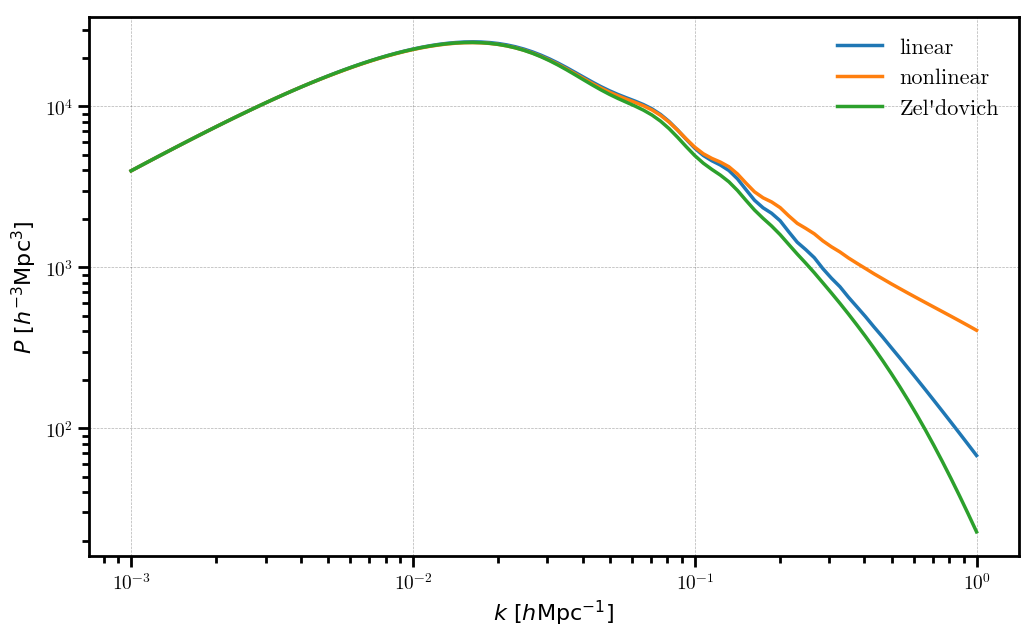

In [7]:
# initialize the power objects
Plin = cosmology.LinearPower(c, redshift=0, transfer='CLASS')
Pnl = cosmology.HalofitPower(c, redshift=0)
Pzel = cosmology.ZeldovichPower(c, redshift=0)

# plot each kind
plt.loglog(k, Plin(k), label='linear')
plt.loglog(k, Pnl(k), label='nonlinear')
plt.loglog(k, Pzel(k), label="Zel'dovich")

# format the axes
plt.legend()
plt.xlabel(r"$k$ $[h \mathrm{Mpc}^{-1}]$")
plt.ylabel(r"$P$ $[h^{-3} \mathrm{Mpc}^{3}]$")
plt.show()

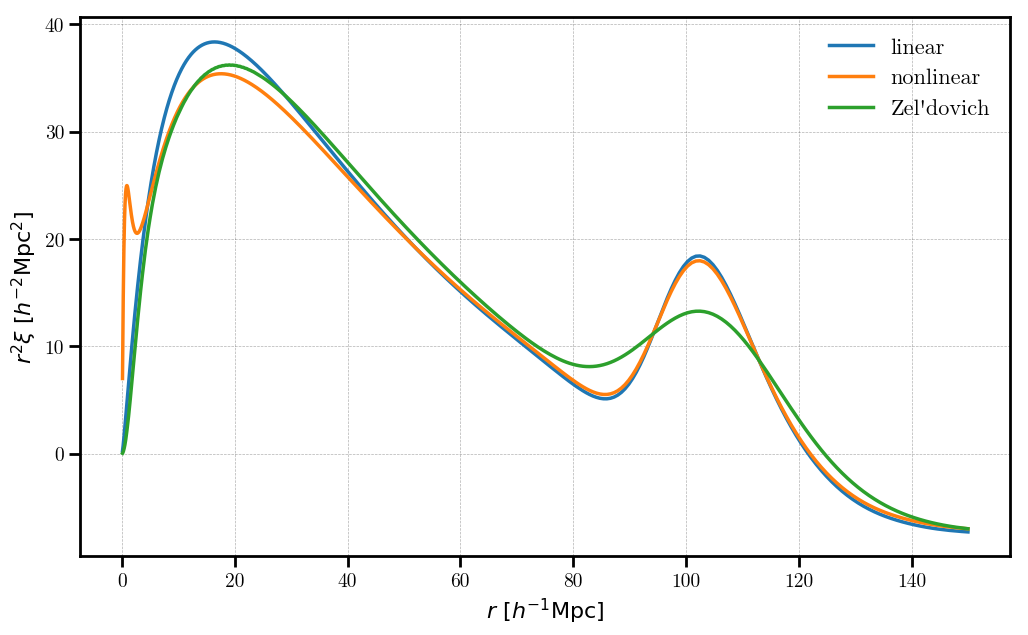

In [8]:
# initialize the correlation objects
cf_lin = cosmology.CorrelationFunction(Plin)
cf_nl = cosmology.CorrelationFunction(Pnl)
cf_zel = cosmology.CorrelationFunction(Pzel)

# plot each kind
r = np.logspace(-1, np.log10(150), 1000)
plt.plot(r, r**2 * cf_lin(r), label='linear')
plt.plot(r, r**2 * cf_nl(r), label='nonlinear')
plt.plot(r, r**2 * cf_zel(r), label="Zel'dovich")

# format the axes
plt.legend()
plt.xlabel(r"$r$ $[h^{-1} \mathrm{Mpc}]$")
plt.ylabel(r"$r^2 \xi \ [h^{-2} \mathrm{Mpc}^2]$")
plt.show()